### Import libraries

In [1]:
# mlrose: created by Genevieve Hayes, modified by Andrew Rollings
import mlrose

# Numpy & pandas
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

### Plotting Function

In [2]:
def run_plot(iterations, data, x_label='Iterations', y_label='Fitness', y_min=None, y_max=None, 
             title=None, scale_x=False, negate=False, save_as=None):
    # Convert dataframe to numpy
    data = data.to_numpy()
    # Negate used to show fitness as max instead of min
    if negate == True:
        data = -1 * data
    # Calculate average and std from multiple runs
    data_mean = np.mean(data, axis=1)
    data_std = np.std(data, axis=1)

    if y_label == 'Fitness':
        line_color = 'orange'
        fitness_mean = data_mean[~np.isnan(data_mean)]
        fitness_std = data_std[~np.isnan(data_std)]
        print("Avg final fitness score: %0.4f (+/- %0.3f)" % (fitness_mean[-1], fitness_std[-1]))
    elif y_label == 'Time (s)':
        line_color = 'purple'
        time_mean = data_mean[~np.isnan(data_mean)]
        time_std = data_std[~np.isnan(data_std)]
        print("Avg elapsed time: %0.4f (+/- %0.3f) seconds" % (time_mean[-1], time_std[-1]))
    
    plt.plot(iterations, data_mean, 
             color=line_color, marker='1', 
             linestyle=':', markersize=5)

    plt.fill_between(iterations, 
                     data_mean + data_std,
                     data_mean - data_std, alpha=0.15,
                     color=line_color)

    plt.grid()
    if scale_x == True:
        plt.xscale('log')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if y_min != None or y_max != None:
        plt.ylim([y_min, y_max])
    plt.tight_layout()
    if save_as != None:
        plt.savefig('./figures/' + save_as + '.png', dpi=300)
    plt.show()

### Travelling Salesman (TSP)

In [3]:
# Generate optimization problem fitness function
problem = mlrose.TSPGenerator.generate(seed=42, number_of_cities=20)

In [4]:
# Solve using randomized hill climbing
experiment_name = 'TSP'

iterations = [i for i in range(0, 2**9+1)]
seeds = [1, 2, 3, 4, 5]
rhc_time_df = pd.DataFrame(index=iterations, columns=seeds)
rhc_fitness_df = pd.DataFrame(index=iterations, columns=seeds)
for seed in seeds:
    rhc = mlrose.RHCRunner(problem=problem,
                           experiment_name=experiment_name,
                           seed=seed,
                           iteration_list=2 ** np.arange(10),
                           max_attempts=1000,
                           restart_list=[15])

    # Results
    df_run_stats, df_run_curves = rhc.run()
    
    # Save and format results for plotting
    rhc_time_df[seed] = df_run_curves['Time']
    rhc_fitness_df[seed] = df_run_curves['Fitness']

Running rhc
*** Iteration START - params: {'max_iters': 512, 'restarts': 15}
restarts:[15], current_restart:[0]
runner_name:[rhc], experiment_name:[TSP], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[2013.8203]


restarts:[15], current_restart:[0]
runner_name:[rhc], experiment_name:[TSP], attempt:[2], iteration:[1], done:[False], time:[0.00], fitness:[2013.8203]


restarts:[15], current_restart:[0]
runner_name:[rhc], experiment_name:[TSP], attempt:[3], iteration:[2], done:[False], time:[0.00], fitness:[2013.8203]


restarts:[15], current_restart:[0]
runner_name:[rhc], experiment_name:[TSP], attempt:[1], iteration:[4], done:[False], time:[0.00], fitness:[1992.1604]


restarts:[15], current_restart:[0]
runner_name:[rhc], experiment_name:[TSP], attempt:[5], iteration:[8], done:[False], time:[0.00], fitness:[1992.1604]


restarts:[15], current_restart:[0]
runner_name:[rhc], experiment_name:[TSP], attempt:[5], iteration:[16], done:[False], time:[0.01], fitness:[1939.7568]


restarts:[15], current_restart:[4]
runner_name:[rhc], experiment_name:[TSP], attempt:[17], iteration:[512], done:[False], time:[0.42], fitness:[1139.8141]


restarts:[15], current_restart:[5]
runner_name:[rhc], experiment_name:[TSP], attempt:[0], iteration:[0], done:[False], time:[0.43], fitness:[2566.7623]


restarts:[15], current_restart:[5]
runner_name:[rhc], experiment_name:[TSP], attempt:[1], iteration:[1], done:[False], time:[0.43], fitness:[2526.5426]


restarts:[15], current_restart:[5]
runner_name:[rhc], experiment_name:[TSP], attempt:[1], iteration:[2], done:[False], time:[0.43], fitness:[2356.8421]


restarts:[15], current_restart:[5]
runner_name:[rhc], experiment_name:[TSP], attempt:[1], iteration:[4], done:[False], time:[0.43], fitness:[2283.0741]


restarts:[15], current_restart:[5]
runner_name:[rhc], experiment_name:[TSP], attempt:[1], iteration:[8], done:[False], time:[0.43], fitness:[2189.5981]


restarts:[15], current_restart:[5]
runner_name:[rhc], experiment_name:[TS

restarts:[15], current_restart:[10]
runner_name:[rhc], experiment_name:[TSP], attempt:[4], iteration:[128], done:[False], time:[0.84], fitness:[1709.8590]


restarts:[15], current_restart:[10]
runner_name:[rhc], experiment_name:[TSP], attempt:[48], iteration:[256], done:[False], time:[0.86], fitness:[1217.5031]


restarts:[15], current_restart:[10]
runner_name:[rhc], experiment_name:[TSP], attempt:[25], iteration:[512], done:[False], time:[0.91], fitness:[1091.1625]


restarts:[15], current_restart:[11]
runner_name:[rhc], experiment_name:[TSP], attempt:[0], iteration:[0], done:[False], time:[0.91], fitness:[2576.2142]


restarts:[15], current_restart:[11]
runner_name:[rhc], experiment_name:[TSP], attempt:[1], iteration:[1], done:[False], time:[0.91], fitness:[2081.1225]


restarts:[15], current_restart:[11]
runner_name:[rhc], experiment_name:[TSP], attempt:[2], iteration:[2], done:[False], time:[0.91], fitness:[2081.1225]


restarts:[15], current_restart:[11]
runner_name:[rhc], experim

restarts:[15], current_restart:[15]
runner_name:[rhc], experiment_name:[TSP], attempt:[22], iteration:[128], done:[False], time:[1.26], fitness:[1372.8008]


restarts:[15], current_restart:[15]
runner_name:[rhc], experiment_name:[TSP], attempt:[24], iteration:[256], done:[False], time:[1.28], fitness:[1255.6402]


restarts:[15], current_restart:[15]
runner_name:[rhc], experiment_name:[TSP], attempt:[132], iteration:[512], done:[False], time:[1.32], fitness:[1138.9291]


*** Iteration END - params: {'max_iters': 512, 'restarts': 15}
Run time: 1.3219545
Running rhc
*** Iteration START - params: {'max_iters': 512, 'restarts': 15}
restarts:[15], current_restart:[0]
runner_name:[rhc], experiment_name:[TSP], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[1724.6542]


restarts:[15], current_restart:[0]
runner_name:[rhc], experiment_name:[TSP], attempt:[2], iteration:[1], done:[False], time:[0.00], fitness:[1724.6542]


restarts:[15], current_restart:[0]
runner_name:[rhc], exp

restarts:[15], current_restart:[5]
runner_name:[rhc], experiment_name:[TSP], attempt:[5], iteration:[16], done:[False], time:[0.49], fitness:[2295.0080]


restarts:[15], current_restart:[5]
runner_name:[rhc], experiment_name:[TSP], attempt:[7], iteration:[32], done:[False], time:[0.49], fitness:[2032.1769]


restarts:[15], current_restart:[5]
runner_name:[rhc], experiment_name:[TSP], attempt:[2], iteration:[64], done:[False], time:[0.51], fitness:[1490.3273]


restarts:[15], current_restart:[5]
runner_name:[rhc], experiment_name:[TSP], attempt:[39], iteration:[128], done:[False], time:[0.53], fitness:[1468.3605]


restarts:[15], current_restart:[5]
runner_name:[rhc], experiment_name:[TSP], attempt:[53], iteration:[256], done:[False], time:[0.57], fitness:[1390.3658]


restarts:[15], current_restart:[5]
runner_name:[rhc], experiment_name:[TSP], attempt:[19], iteration:[512], done:[False], time:[0.67], fitness:[1284.5382]


restarts:[15], current_restart:[6]
runner_name:[rhc], experiment

restarts:[15], current_restart:[11]
runner_name:[rhc], experiment_name:[TSP], attempt:[99], iteration:[512], done:[False], time:[1.28], fitness:[1100.2375]


restarts:[15], current_restart:[12]
runner_name:[rhc], experiment_name:[TSP], attempt:[0], iteration:[0], done:[False], time:[1.28], fitness:[2649.7577]


restarts:[15], current_restart:[12]
runner_name:[rhc], experiment_name:[TSP], attempt:[1], iteration:[1], done:[False], time:[1.28], fitness:[2565.4797]


restarts:[15], current_restart:[12]
runner_name:[rhc], experiment_name:[TSP], attempt:[2], iteration:[2], done:[False], time:[1.28], fitness:[2565.4797]


restarts:[15], current_restart:[12]
runner_name:[rhc], experiment_name:[TSP], attempt:[1], iteration:[4], done:[False], time:[1.29], fitness:[2548.7298]


restarts:[15], current_restart:[12]
runner_name:[rhc], experiment_name:[TSP], attempt:[1], iteration:[8], done:[False], time:[1.29], fitness:[2114.5561]


restarts:[15], current_restart:[12]
runner_name:[rhc], experiment_n

restarts:[15], current_restart:[1]
runner_name:[rhc], experiment_name:[TSP], attempt:[21], iteration:[512], done:[False], time:[0.24], fitness:[1138.8821]


restarts:[15], current_restart:[2]
runner_name:[rhc], experiment_name:[TSP], attempt:[0], iteration:[0], done:[False], time:[0.25], fitness:[2543.3056]


restarts:[15], current_restart:[2]
runner_name:[rhc], experiment_name:[TSP], attempt:[1], iteration:[1], done:[False], time:[0.25], fitness:[2528.5138]


restarts:[15], current_restart:[2]
runner_name:[rhc], experiment_name:[TSP], attempt:[1], iteration:[2], done:[False], time:[0.25], fitness:[2467.2625]


restarts:[15], current_restart:[2]
runner_name:[rhc], experiment_name:[TSP], attempt:[2], iteration:[4], done:[False], time:[0.25], fitness:[2376.7975]


restarts:[15], current_restart:[2]
runner_name:[rhc], experiment_name:[TSP], attempt:[2], iteration:[8], done:[False], time:[0.25], fitness:[2280.1386]


restarts:[15], current_restart:[2]
runner_name:[rhc], experiment_name:[TS



restarts:[15], current_restart:[8]
runner_name:[rhc], experiment_name:[TSP], attempt:[1], iteration:[16], done:[False], time:[0.82], fitness:[1699.8743]


restarts:[15], current_restart:[8]
runner_name:[rhc], experiment_name:[TSP], attempt:[6], iteration:[32], done:[False], time:[0.82], fitness:[1610.5621]


restarts:[15], current_restart:[8]
runner_name:[rhc], experiment_name:[TSP], attempt:[15], iteration:[64], done:[False], time:[0.83], fitness:[1468.6987]


restarts:[15], current_restart:[8]
runner_name:[rhc], experiment_name:[TSP], attempt:[6], iteration:[128], done:[False], time:[0.85], fitness:[1352.6105]


restarts:[15], current_restart:[8]
runner_name:[rhc], experiment_name:[TSP], attempt:[5], iteration:[256], done:[False], time:[0.87], fitness:[1292.0199]


restarts:[15], current_restart:[8]
runner_name:[rhc], experiment_name:[TSP], attempt:[58], iteration:[512], done:[False], time:[0.91], fitness:[1108.3580]


restarts:[15], current_restart:[9]
runner_name:[rhc], experimen

restarts:[15], current_restart:[13]
runner_name:[rhc], experiment_name:[TSP], attempt:[5], iteration:[128], done:[False], time:[1.26], fitness:[1469.3718]


restarts:[15], current_restart:[13]
runner_name:[rhc], experiment_name:[TSP], attempt:[8], iteration:[256], done:[False], time:[1.28], fitness:[1327.0152]


restarts:[15], current_restart:[13]
runner_name:[rhc], experiment_name:[TSP], attempt:[54], iteration:[512], done:[False], time:[1.32], fitness:[1210.6037]


restarts:[15], current_restart:[14]
runner_name:[rhc], experiment_name:[TSP], attempt:[0], iteration:[0], done:[False], time:[1.32], fitness:[2556.7011]


restarts:[15], current_restart:[14]
runner_name:[rhc], experiment_name:[TSP], attempt:[2], iteration:[1], done:[False], time:[1.32], fitness:[2556.7011]


restarts:[15], current_restart:[14]
runner_name:[rhc], experiment_name:[TSP], attempt:[3], iteration:[2], done:[False], time:[1.32], fitness:[2556.7011]


restarts:[15], current_restart:[14]
runner_name:[rhc], experime

restarts:[15], current_restart:[4]
runner_name:[rhc], experiment_name:[TSP], attempt:[15], iteration:[128], done:[False], time:[0.35], fitness:[1585.4196]


restarts:[15], current_restart:[4]
runner_name:[rhc], experiment_name:[TSP], attempt:[8], iteration:[256], done:[False], time:[0.37], fitness:[1500.1133]


restarts:[15], current_restart:[4]
runner_name:[rhc], experiment_name:[TSP], attempt:[15], iteration:[512], done:[False], time:[0.41], fitness:[1284.5917]


restarts:[15], current_restart:[5]
runner_name:[rhc], experiment_name:[TSP], attempt:[0], iteration:[0], done:[False], time:[0.41], fitness:[2738.9197]


restarts:[15], current_restart:[5]
runner_name:[rhc], experiment_name:[TSP], attempt:[1], iteration:[1], done:[False], time:[0.41], fitness:[2586.0145]


restarts:[15], current_restart:[5]
runner_name:[rhc], experiment_name:[TSP], attempt:[1], iteration:[2], done:[False], time:[0.42], fitness:[2541.7537]


restarts:[15], current_restart:[5]
runner_name:[rhc], experiment_nam

restarts:[15], current_restart:[9]
runner_name:[rhc], experiment_name:[TSP], attempt:[32], iteration:[128], done:[False], time:[0.76], fitness:[1561.2718]


restarts:[15], current_restart:[9]
runner_name:[rhc], experiment_name:[TSP], attempt:[23], iteration:[256], done:[False], time:[0.78], fitness:[1019.8139]


restarts:[15], current_restart:[9]
runner_name:[rhc], experiment_name:[TSP], attempt:[207], iteration:[512], done:[False], time:[0.82], fitness:[929.4828]


restarts:[15], current_restart:[10]
runner_name:[rhc], experiment_name:[TSP], attempt:[0], iteration:[0], done:[False], time:[0.82], fitness:[2154.4096]


restarts:[15], current_restart:[10]
runner_name:[rhc], experiment_name:[TSP], attempt:[2], iteration:[1], done:[False], time:[0.82], fitness:[2154.4096]


restarts:[15], current_restart:[10]
runner_name:[rhc], experiment_name:[TSP], attempt:[3], iteration:[2], done:[False], time:[0.82], fitness:[2154.4096]


restarts:[15], current_restart:[10]
runner_name:[rhc], experimen

restarts:[15], current_restart:[14]
runner_name:[rhc], experiment_name:[TSP], attempt:[21], iteration:[256], done:[False], time:[1.19], fitness:[1448.2242]


restarts:[15], current_restart:[14]
runner_name:[rhc], experiment_name:[TSP], attempt:[5], iteration:[512], done:[False], time:[1.23], fitness:[1009.3375]


restarts:[15], current_restart:[15]
runner_name:[rhc], experiment_name:[TSP], attempt:[0], iteration:[0], done:[False], time:[1.23], fitness:[2902.0771]


restarts:[15], current_restart:[15]
runner_name:[rhc], experiment_name:[TSP], attempt:[1], iteration:[1], done:[False], time:[1.24], fitness:[2844.1585]


restarts:[15], current_restart:[15]
runner_name:[rhc], experiment_name:[TSP], attempt:[2], iteration:[2], done:[False], time:[1.24], fitness:[2844.1585]


restarts:[15], current_restart:[15]
runner_name:[rhc], experiment_name:[TSP], attempt:[2], iteration:[4], done:[False], time:[1.25], fitness:[2740.5051]


restarts:[15], current_restart:[15]
runner_name:[rhc], experiment

restarts:[15], current_restart:[4]
runner_name:[rhc], experiment_name:[TSP], attempt:[46], iteration:[256], done:[False], time:[0.40], fitness:[1337.3425]


restarts:[15], current_restart:[4]
runner_name:[rhc], experiment_name:[TSP], attempt:[142], iteration:[512], done:[False], time:[0.44], fitness:[1147.1710]


restarts:[15], current_restart:[5]
runner_name:[rhc], experiment_name:[TSP], attempt:[0], iteration:[0], done:[False], time:[0.44], fitness:[2481.6238]


restarts:[15], current_restart:[5]
runner_name:[rhc], experiment_name:[TSP], attempt:[1], iteration:[1], done:[False], time:[0.44], fitness:[2471.0995]


restarts:[15], current_restart:[5]
runner_name:[rhc], experiment_name:[TSP], attempt:[2], iteration:[2], done:[False], time:[0.44], fitness:[2471.0995]


restarts:[15], current_restart:[5]
runner_name:[rhc], experiment_name:[TSP], attempt:[1], iteration:[4], done:[False], time:[0.44], fitness:[2175.5230]


restarts:[15], current_restart:[5]
runner_name:[rhc], experiment_name

restarts:[15], current_restart:[9]
runner_name:[rhc], experiment_name:[TSP], attempt:[23], iteration:[64], done:[False], time:[0.79], fitness:[1486.4128]


restarts:[15], current_restart:[9]
runner_name:[rhc], experiment_name:[TSP], attempt:[5], iteration:[128], done:[False], time:[0.80], fitness:[1360.9935]


restarts:[15], current_restart:[9]
runner_name:[rhc], experiment_name:[TSP], attempt:[8], iteration:[256], done:[False], time:[0.82], fitness:[1289.4545]


restarts:[15], current_restart:[9]
runner_name:[rhc], experiment_name:[TSP], attempt:[35], iteration:[512], done:[False], time:[0.87], fitness:[1270.8517]


restarts:[15], current_restart:[10]
runner_name:[rhc], experiment_name:[TSP], attempt:[0], iteration:[0], done:[False], time:[0.87], fitness:[2598.5675]


restarts:[15], current_restart:[10]
runner_name:[rhc], experiment_name:[TSP], attempt:[1], iteration:[1], done:[False], time:[0.87], fitness:[2520.3995]


restarts:[15], current_restart:[10]
runner_name:[rhc], experiment

Avg final fitness score: -991.6789 (+/- 38.504)


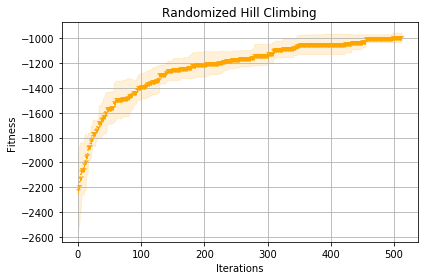

Avg elapsed time: 0.0953 (+/- 0.022) seconds


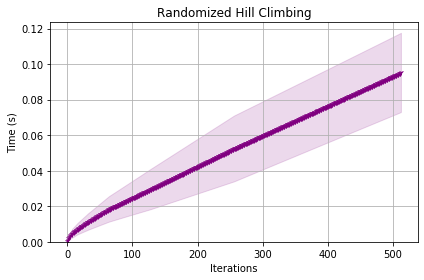

In [5]:
run_plot(iterations=iterations, data=rhc_fitness_df, x_label='Iterations', y_label='Fitness', 
         title='Randomized Hill Climbing', scale_x=False, y_min=None, y_max=None, negate=True, save_as='RHC/TSP_fitness')
run_plot(iterations=iterations, data=rhc_time_df, x_label='Iterations', y_label='Time (s)', 
         title='Randomized Hill Climbing', scale_x=False, y_min=0, y_max=None, save_as='RHC/TSP_time')

In [6]:
# Solve using simulated annealing
experiment_name = 'TSP'

iterations = [i for i in range(0, 2**10+1)]
seeds = [1, 2, 3, 4, 5]
sa_time_df = pd.DataFrame(index=iterations, columns=seeds)
sa_fitness_df = pd.DataFrame(index=iterations, columns=seeds)
for seed in seeds:
    # Using default mlrose.GeomDecay as the decay schedule
    sa = mlrose.SARunner(problem=problem,
                         experiment_name=experiment_name,
                         seed=seed,
                         iteration_list=2 ** np.arange(11),
                         max_attempts=1000,
                         temperature_list=[100])

    # Results
    df_run_stats, df_run_curves = sa.run()
    
    # Save and format results for plotting
    sa_time_df[seed] = df_run_curves['Time']
    sa_fitness_df[seed] = df_run_curves['Fitness']

Running sa
*** Iteration START - params: {'max_iters': 1024, 'schedule': GeomDecay(init_temp=100, decay=0.99, min_temp=0.001)}
schedule:[100]
runner_name:[sa], experiment_name:[TSP], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[2013.8203]


schedule:[100]
runner_name:[sa], experiment_name:[TSP], attempt:[2], iteration:[1], done:[False], time:[0.00], fitness:[2013.8203]


schedule:[100]
runner_name:[sa], experiment_name:[TSP], attempt:[3], iteration:[2], done:[False], time:[0.00], fitness:[2013.8203]


schedule:[100]
runner_name:[sa], experiment_name:[TSP], attempt:[2], iteration:[4], done:[False], time:[0.01], fitness:[1908.2596]


schedule:[100]
runner_name:[sa], experiment_name:[TSP], attempt:[1], iteration:[8], done:[False], time:[0.01], fitness:[1825.3618]


schedule:[100]
runner_name:[sa], experiment_name:[TSP], attempt:[1], iteration:[16], done:[False], time:[0.01], fitness:[2037.2704]


schedule:[100]
runner_name:[sa], experiment_name:[TSP], attempt:[2], itera

c:\users\lieng\src\mlrose-hiive\mlrose\algorithms\sa.py:111: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)



runner_name:[sa], experiment_name:[TSP], attempt:[148], iteration:[1024], done:[False], time:[0.20], fitness:[1147.9439]


*** Iteration END - params: {'max_iters': 1024, 'schedule': GeomDecay(init_temp=100, decay=0.99, min_temp=0.001)}
Run time: 0.20611790000000063
Running sa
*** Iteration START - params: {'max_iters': 1024, 'schedule': GeomDecay(init_temp=100, decay=0.99, min_temp=0.001)}
schedule:[100]
runner_name:[sa], experiment_name:[TSP], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[1724.6542]


schedule:[100]
runner_name:[sa], experiment_name:[TSP], attempt:[2], iteration:[1], done:[False], time:[0.00], fitness:[1724.6542]


schedule:[100]
runner_name:[sa], experiment_name:[TSP], attempt:[1], iteration:[2], done:[False], time:[0.00], fitness:[1855.2253]


schedule:[100]
runner_name:[sa], experiment_name:[TSP], attempt:[3], iteration:[4], done:[False], time:[0.00], fitness:[1855.2253]


schedule:[100]
runner_name:[sa], experiment_name:[TSP], attempt:[1], iter

Avg final fitness score: -1110.5252 (+/- 70.238)


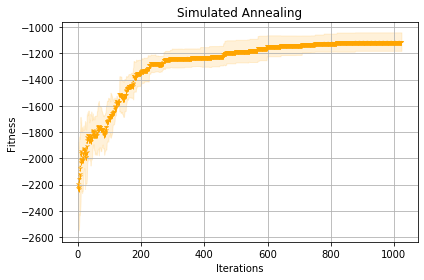

Avg elapsed time: 0.1934 (+/- 0.006) seconds


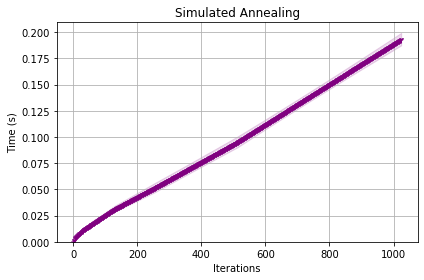

In [7]:
run_plot(iterations=iterations, data=sa_fitness_df, x_label='Iterations', y_label='Fitness', 
         title='Simulated Annealing', scale_x=False, y_min=None, y_max=None, negate=True, save_as='SA/TSP_fitness')
run_plot(iterations=iterations, data=sa_time_df, x_label='Iterations', y_label='Time (s)', 
         title='Simulated Annealing', scale_x=False, y_min=0, y_max=None, save_as='SA/TSP_time')

In [8]:
# Solve using genetic algorithm
experiment_name = 'TSP'

iterations = [i for i in range(0, 2**10+1)]
seeds = [1, 2, 3, 4, 5]
ga_time_df = pd.DataFrame(index=iterations, columns=seeds)
ga_fitness_df = pd.DataFrame(index=iterations, columns=seeds)
for seed in seeds:
    ga = mlrose.GARunner(problem=problem,
                         experiment_name=experiment_name,
                         seed=seed,
                         iteration_list=2 ** np.arange(11),
                         max_attempts=1000,
                         population_sizes=[200],
                         mutation_rates=[0.2])

    # Results
    df_run_stats, df_run_curves = ga.run()
    
    # Save and format results for plotting
    ga_time_df[seed] = df_run_curves['Time']
    ga_fitness_df[seed] = df_run_curves['Fitness']

Running ga
*** Iteration START - params: {'max_iters': 1024, 'pop_size': 200, 'mutation_prob': 0.2}
pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[TSP], attempt:[0], iteration:[0], done:[False], time:[0.02], fitness:[2013.8203]


pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[TSP], attempt:[1], iteration:[1], done:[False], time:[0.06], fitness:[1823.0396]


pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[TSP], attempt:[1], iteration:[2], done:[False], time:[0.08], fitness:[1716.6732]


pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[TSP], attempt:[1], iteration:[4], done:[False], time:[0.14], fitness:[1693.0038]


pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[TSP], attempt:[3], iteration:[8], done:[False], time:[0.26], fitness:[1578.5374]


pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[TSP], attempt:[1], iteration:[16], done:[False], time:[0.51

pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[TSP], attempt:[3], iteration:[8], done:[False], time:[0.25], fitness:[1600.7931]


pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[TSP], attempt:[5], iteration:[16], done:[False], time:[0.47], fitness:[1593.2206]


pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[TSP], attempt:[2], iteration:[32], done:[False], time:[0.93], fitness:[1461.0213]


pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[TSP], attempt:[20], iteration:[64], done:[False], time:[1.87], fitness:[1285.8281]


pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[TSP], attempt:[17], iteration:[128], done:[False], time:[3.71], fitness:[1148.3528]


pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[TSP], attempt:[5], iteration:[256], done:[False], time:[7.73], fitness:[1010.2780]


pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_na

Avg final fitness score: -907.6552 (+/- 23.677)


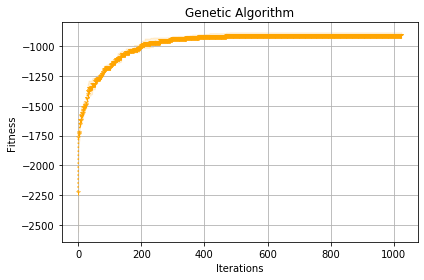

Avg elapsed time: 30.6756 (+/- 0.768) seconds


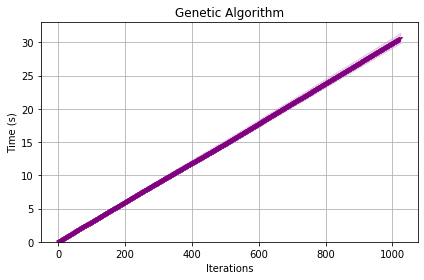

In [9]:
run_plot(iterations=iterations, data=ga_fitness_df, x_label='Iterations', y_label='Fitness', 
         title='Genetic Algorithm', scale_x=False, y_min=None, y_max=None, negate=True, save_as='GA/TSP_fitness')
run_plot(iterations=iterations, data=ga_time_df, x_label='Iterations', y_label='Time (s)', 
         title='Genetic Algorithm', scale_x=False, y_min=0, y_max=None, save_as='GA/TSP_time')

In [10]:
# Solve using MIMIC algorithm
experiment_name = 'TSP'

iterations = [i for i in range(0, 2**10+1)]
seeds = [1, 2, 3, 4, 5]
mimic_time_df = pd.DataFrame(index=iterations, columns=seeds)
mimic_fitness_df = pd.DataFrame(index=iterations, columns=seeds)
for seed in seeds:
    mimic = mlrose.MIMICRunner(problem=problem,
                               experiment_name=experiment_name,
                               seed=seed,
                               iteration_list=2 ** np.arange(11),
                               max_attempts=1000,
                               population_sizes=[400],
                               keep_percent_list=[0.6])
    # Results
    df_run_stats, df_run_curves = mimic.run()

    # Save and format results for plotting
    mimic_time_df[seed] = df_run_curves['Time']
    mimic_fitness_df[seed] = df_run_curves['Fitness']

Running mimic
*** Iteration START - params: {'max_iters': 1024, 'pop_size': 400, 'keep_pct': 0.6}
pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[TSP], attempt:[0], iteration:[0], done:[False], time:[0.04], fitness:[2013.8203]


pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[TSP], attempt:[1], iteration:[1], done:[False], time:[0.54], fitness:[1837.5196]


pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[TSP], attempt:[1], iteration:[2], done:[False], time:[1.05], fitness:[1806.6539]


pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[TSP], attempt:[2], iteration:[4], done:[False], time:[2.06], fitness:[1748.3404]


pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[TSP], attempt:[2], iteration:[8], done:[False], time:[4.13], fitness:[1588.1452]


pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[TSP], attempt:[3], iteration:[16], done:[False], time:[8.15], fitness:[14

pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[TSP], attempt:[1], iteration:[1], done:[False], time:[0.58], fitness:[1780.7698]


pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[TSP], attempt:[1], iteration:[2], done:[False], time:[1.11], fitness:[1666.7084]


pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[TSP], attempt:[1], iteration:[4], done:[False], time:[2.15], fitness:[1653.9078]


pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[TSP], attempt:[5], iteration:[8], done:[False], time:[4.27], fitness:[1653.9078]


pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[TSP], attempt:[5], iteration:[16], done:[False], time:[8.36], fitness:[1312.5921]


pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[TSP], attempt:[21], iteration:[32], done:[False], time:[16.36], fitness:[1312.5921]


pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[TSP], attempt:[

Avg final fitness score: -1334.5794 (+/- 12.335)


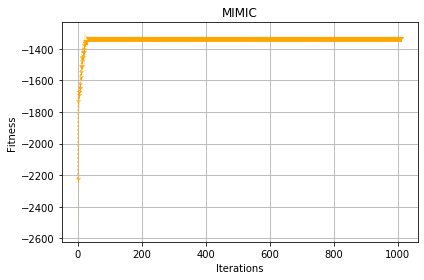

Avg elapsed time: 515.9524 (+/- 6.675) seconds


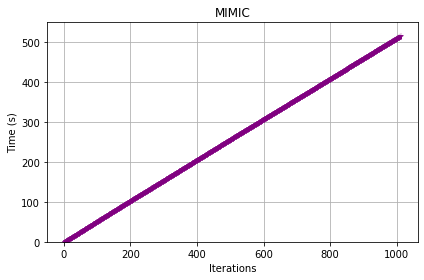

In [11]:
run_plot(iterations=iterations, data=mimic_fitness_df, x_label='Iterations', y_label='Fitness', 
         title='MIMIC', scale_x=False, y_min=None, y_max=None, negate=True, save_as='MIMIC/TSP_fitness')
run_plot(iterations=iterations, data=mimic_time_df, x_label='Iterations', y_label='Time (s)', 
         title='MIMIC', scale_x=False, y_min=0, y_max=None, save_as='MIMIC/TSP_time')

### Queens

In [12]:
# Generate optimization problem fitness function
problem = mlrose.QueensGenerator.generate(seed=42, size=20)

In [13]:
# Solve using randomized hill climbing
experiment_name = 'Queens'

iterations = [i for i in range(0, 2**10+1)]
seeds = [1, 2, 3, 4, 5]
rhc_time_df = pd.DataFrame(index=iterations, columns=seeds)
rhc_fitness_df = pd.DataFrame(index=iterations, columns=seeds)
for seed in seeds:
    rhc = mlrose.RHCRunner(problem=problem,
                           experiment_name=experiment_name,
                           seed=seed,
                           iteration_list=2 ** np.arange(11),
                           max_attempts=1000,
                           restart_list=[15])

    # Results
    df_run_stats, df_run_curves = rhc.run()
    
    # Save and format results for plotting
    rhc_time_df[seed] = df_run_curves['Time']
    rhc_fitness_df[seed] = df_run_curves['Fitness']

Running rhc
*** Iteration START - params: {'max_iters': 1024, 'restarts': 15}
restarts:[15], current_restart:[0]
runner_name:[rhc], experiment_name:[Queens], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[17.0000]


restarts:[15], current_restart:[0]
runner_name:[rhc], experiment_name:[Queens], attempt:[2], iteration:[1], done:[False], time:[0.00], fitness:[17.0000]


restarts:[15], current_restart:[0]
runner_name:[rhc], experiment_name:[Queens], attempt:[3], iteration:[2], done:[False], time:[0.00], fitness:[17.0000]


restarts:[15], current_restart:[0]
runner_name:[rhc], experiment_name:[Queens], attempt:[2], iteration:[4], done:[False], time:[0.01], fitness:[16.0000]


restarts:[15], current_restart:[0]
runner_name:[rhc], experiment_name:[Queens], attempt:[6], iteration:[8], done:[False], time:[0.01], fitness:[16.0000]


restarts:[15], current_restart:[0]
runner_name:[rhc], experiment_name:[Queens], attempt:[1], iteration:[16], done:[False], time:[0.02], fitness:[11

restarts:[15], current_restart:[4]
runner_name:[rhc], experiment_name:[Queens], attempt:[339], iteration:[512], done:[False], time:[2.39], fitness:[4.0000]


restarts:[15], current_restart:[4]
runner_name:[rhc], experiment_name:[Queens], attempt:[851], iteration:[1024], done:[False], time:[2.66], fitness:[4.0000]


restarts:[15], current_restart:[5]
runner_name:[rhc], experiment_name:[Queens], attempt:[0], iteration:[0], done:[False], time:[2.66], fitness:[24.0000]


restarts:[15], current_restart:[5]
runner_name:[rhc], experiment_name:[Queens], attempt:[2], iteration:[1], done:[False], time:[2.66], fitness:[24.0000]


restarts:[15], current_restart:[5]
runner_name:[rhc], experiment_name:[Queens], attempt:[1], iteration:[2], done:[False], time:[2.66], fitness:[22.0000]


restarts:[15], current_restart:[5]
runner_name:[rhc], experiment_name:[Queens], attempt:[1], iteration:[4], done:[False], time:[2.66], fitness:[19.0000]


restarts:[15], current_restart:[5]
runner_name:[rhc], experimen

restarts:[15], current_restart:[9]
runner_name:[rhc], experiment_name:[Queens], attempt:[14], iteration:[512], done:[False], time:[5.22], fitness:[3.0000]


restarts:[15], current_restart:[9]
runner_name:[rhc], experiment_name:[Queens], attempt:[526], iteration:[1024], done:[False], time:[5.50], fitness:[3.0000]


restarts:[15], current_restart:[10]
runner_name:[rhc], experiment_name:[Queens], attempt:[0], iteration:[0], done:[False], time:[5.50], fitness:[16.0000]


restarts:[15], current_restart:[10]
runner_name:[rhc], experiment_name:[Queens], attempt:[2], iteration:[1], done:[False], time:[5.50], fitness:[16.0000]


restarts:[15], current_restart:[10]
runner_name:[rhc], experiment_name:[Queens], attempt:[3], iteration:[2], done:[False], time:[5.50], fitness:[16.0000]


restarts:[15], current_restart:[10]
runner_name:[rhc], experiment_name:[Queens], attempt:[2], iteration:[4], done:[False], time:[5.50], fitness:[15.0000]


restarts:[15], current_restart:[10]
runner_name:[rhc], exper

restarts:[15], current_restart:[14]
runner_name:[rhc], experiment_name:[Queens], attempt:[277], iteration:[512], done:[False], time:[8.05], fitness:[2.0000]


restarts:[15], current_restart:[14]
runner_name:[rhc], experiment_name:[Queens], attempt:[789], iteration:[1024], done:[False], time:[8.35], fitness:[2.0000]


restarts:[15], current_restart:[15]
runner_name:[rhc], experiment_name:[Queens], attempt:[0], iteration:[0], done:[False], time:[8.36], fitness:[20.0000]


restarts:[15], current_restart:[15]
runner_name:[rhc], experiment_name:[Queens], attempt:[1], iteration:[1], done:[False], time:[8.36], fitness:[19.0000]


restarts:[15], current_restart:[15]
runner_name:[rhc], experiment_name:[Queens], attempt:[1], iteration:[2], done:[False], time:[8.36], fitness:[18.0000]


restarts:[15], current_restart:[15]
runner_name:[rhc], experiment_name:[Queens], attempt:[2], iteration:[4], done:[False], time:[8.36], fitness:[17.0000]


restarts:[15], current_restart:[15]
runner_name:[rhc], ex

restarts:[15], current_restart:[3]
runner_name:[rhc], experiment_name:[Queens], attempt:[325], iteration:[512], done:[False], time:[1.85], fitness:[4.0000]


restarts:[15], current_restart:[3]
runner_name:[rhc], experiment_name:[Queens], attempt:[837], iteration:[1024], done:[False], time:[2.11], fitness:[4.0000]


restarts:[15], current_restart:[4]
runner_name:[rhc], experiment_name:[Queens], attempt:[0], iteration:[0], done:[False], time:[2.11], fitness:[26.0000]


restarts:[15], current_restart:[4]
runner_name:[rhc], experiment_name:[Queens], attempt:[2], iteration:[1], done:[False], time:[2.11], fitness:[26.0000]


restarts:[15], current_restart:[4]
runner_name:[rhc], experiment_name:[Queens], attempt:[1], iteration:[2], done:[False], time:[2.11], fitness:[24.0000]


restarts:[15], current_restart:[4]
runner_name:[rhc], experiment_name:[Queens], attempt:[1], iteration:[4], done:[False], time:[2.12], fitness:[22.0000]


restarts:[15], current_restart:[4]
runner_name:[rhc], experimen

restarts:[15], current_restart:[8]
runner_name:[rhc], experiment_name:[Queens], attempt:[124], iteration:[512], done:[False], time:[4.46], fitness:[3.0000]


restarts:[15], current_restart:[8]
runner_name:[rhc], experiment_name:[Queens], attempt:[636], iteration:[1024], done:[False], time:[4.94], fitness:[3.0000]


restarts:[15], current_restart:[9]
runner_name:[rhc], experiment_name:[Queens], attempt:[0], iteration:[0], done:[False], time:[4.94], fitness:[27.0000]


restarts:[15], current_restart:[9]
runner_name:[rhc], experiment_name:[Queens], attempt:[2], iteration:[1], done:[False], time:[4.94], fitness:[27.0000]


restarts:[15], current_restart:[9]
runner_name:[rhc], experiment_name:[Queens], attempt:[1], iteration:[2], done:[False], time:[4.95], fitness:[26.0000]


restarts:[15], current_restart:[9]
runner_name:[rhc], experiment_name:[Queens], attempt:[2], iteration:[4], done:[False], time:[4.95], fitness:[25.0000]


restarts:[15], current_restart:[9]
runner_name:[rhc], experimen

restarts:[15], current_restart:[13]
runner_name:[rhc], experiment_name:[Queens], attempt:[132], iteration:[512], done:[False], time:[7.57], fitness:[4.0000]


restarts:[15], current_restart:[13]
runner_name:[rhc], experiment_name:[Queens], attempt:[403], iteration:[1024], done:[False], time:[7.87], fitness:[3.0000]


restarts:[15], current_restart:[14]
runner_name:[rhc], experiment_name:[Queens], attempt:[0], iteration:[0], done:[False], time:[7.87], fitness:[23.0000]


restarts:[15], current_restart:[14]
runner_name:[rhc], experiment_name:[Queens], attempt:[1], iteration:[1], done:[False], time:[7.87], fitness:[21.0000]


restarts:[15], current_restart:[14]
runner_name:[rhc], experiment_name:[Queens], attempt:[2], iteration:[2], done:[False], time:[7.87], fitness:[21.0000]


restarts:[15], current_restart:[14]
runner_name:[rhc], experiment_name:[Queens], attempt:[4], iteration:[4], done:[False], time:[7.88], fitness:[21.0000]


restarts:[15], current_restart:[14]
runner_name:[rhc], ex

restarts:[15], current_restart:[2]
runner_name:[rhc], experiment_name:[Queens], attempt:[253], iteration:[512], done:[False], time:[1.36], fitness:[3.0000]


restarts:[15], current_restart:[2]
runner_name:[rhc], experiment_name:[Queens], attempt:[765], iteration:[1024], done:[False], time:[1.61], fitness:[3.0000]


restarts:[15], current_restart:[3]
runner_name:[rhc], experiment_name:[Queens], attempt:[0], iteration:[0], done:[False], time:[1.62], fitness:[16.0000]


restarts:[15], current_restart:[3]
runner_name:[rhc], experiment_name:[Queens], attempt:[2], iteration:[1], done:[False], time:[1.62], fitness:[16.0000]


restarts:[15], current_restart:[3]
runner_name:[rhc], experiment_name:[Queens], attempt:[1], iteration:[2], done:[False], time:[1.62], fitness:[13.0000]


restarts:[15], current_restart:[3]
runner_name:[rhc], experiment_name:[Queens], attempt:[3], iteration:[4], done:[False], time:[1.62], fitness:[13.0000]


restarts:[15], current_restart:[3]
runner_name:[rhc], experimen

restarts:[15], current_restart:[7]
runner_name:[rhc], experiment_name:[Queens], attempt:[400], iteration:[512], done:[False], time:[4.04], fitness:[4.0000]


restarts:[15], current_restart:[7]
runner_name:[rhc], experiment_name:[Queens], attempt:[317], iteration:[1024], done:[False], time:[4.34], fitness:[3.0000]


restarts:[15], current_restart:[8]
runner_name:[rhc], experiment_name:[Queens], attempt:[0], iteration:[0], done:[False], time:[4.35], fitness:[19.0000]


restarts:[15], current_restart:[8]
runner_name:[rhc], experiment_name:[Queens], attempt:[2], iteration:[1], done:[False], time:[4.35], fitness:[19.0000]


restarts:[15], current_restart:[8]
runner_name:[rhc], experiment_name:[Queens], attempt:[3], iteration:[2], done:[False], time:[4.35], fitness:[19.0000]


restarts:[15], current_restart:[8]
runner_name:[rhc], experiment_name:[Queens], attempt:[1], iteration:[4], done:[False], time:[4.35], fitness:[17.0000]


restarts:[15], current_restart:[8]
runner_name:[rhc], experimen

restarts:[15], current_restart:[12]
runner_name:[rhc], experiment_name:[Queens], attempt:[188], iteration:[512], done:[False], time:[6.94], fitness:[2.0000]


restarts:[15], current_restart:[12]
runner_name:[rhc], experiment_name:[Queens], attempt:[451], iteration:[1024], done:[False], time:[7.22], fitness:[1.0000]


restarts:[15], current_restart:[13]
runner_name:[rhc], experiment_name:[Queens], attempt:[0], iteration:[0], done:[False], time:[7.22], fitness:[18.0000]


restarts:[15], current_restart:[13]
runner_name:[rhc], experiment_name:[Queens], attempt:[1], iteration:[1], done:[False], time:[7.22], fitness:[16.0000]


restarts:[15], current_restart:[13]
runner_name:[rhc], experiment_name:[Queens], attempt:[2], iteration:[2], done:[False], time:[7.22], fitness:[16.0000]


restarts:[15], current_restart:[13]
runner_name:[rhc], experiment_name:[Queens], attempt:[4], iteration:[4], done:[False], time:[7.23], fitness:[16.0000]


restarts:[15], current_restart:[13]
runner_name:[rhc], ex

restarts:[15], current_restart:[1]
runner_name:[rhc], experiment_name:[Queens], attempt:[334], iteration:[512], done:[False], time:[1.24], fitness:[4.0000]


restarts:[15], current_restart:[1]
runner_name:[rhc], experiment_name:[Queens], attempt:[846], iteration:[1024], done:[False], time:[1.50], fitness:[4.0000]


restarts:[15], current_restart:[2]
runner_name:[rhc], experiment_name:[Queens], attempt:[0], iteration:[0], done:[False], time:[1.50], fitness:[16.0000]


restarts:[15], current_restart:[2]
runner_name:[rhc], experiment_name:[Queens], attempt:[2], iteration:[1], done:[False], time:[1.50], fitness:[16.0000]


restarts:[15], current_restart:[2]
runner_name:[rhc], experiment_name:[Queens], attempt:[3], iteration:[2], done:[False], time:[1.50], fitness:[16.0000]


restarts:[15], current_restart:[2]
runner_name:[rhc], experiment_name:[Queens], attempt:[5], iteration:[4], done:[False], time:[1.50], fitness:[16.0000]


restarts:[15], current_restart:[2]
runner_name:[rhc], experimen

restarts:[15], current_restart:[6]
runner_name:[rhc], experiment_name:[Queens], attempt:[55], iteration:[512], done:[False], time:[4.07], fitness:[4.0000]


restarts:[15], current_restart:[6]
runner_name:[rhc], experiment_name:[Queens], attempt:[254], iteration:[1024], done:[False], time:[4.36], fitness:[1.0000]


restarts:[15], current_restart:[7]
runner_name:[rhc], experiment_name:[Queens], attempt:[0], iteration:[0], done:[False], time:[4.36], fitness:[16.0000]


restarts:[15], current_restart:[7]
runner_name:[rhc], experiment_name:[Queens], attempt:[2], iteration:[1], done:[False], time:[4.36], fitness:[16.0000]


restarts:[15], current_restart:[7]
runner_name:[rhc], experiment_name:[Queens], attempt:[3], iteration:[2], done:[False], time:[4.36], fitness:[16.0000]


restarts:[15], current_restart:[7]
runner_name:[rhc], experiment_name:[Queens], attempt:[5], iteration:[4], done:[False], time:[4.36], fitness:[16.0000]


restarts:[15], current_restart:[7]
runner_name:[rhc], experiment

restarts:[15], current_restart:[11]
runner_name:[rhc], experiment_name:[Queens], attempt:[255], iteration:[512], done:[False], time:[7.09], fitness:[4.0000]


restarts:[15], current_restart:[11]
runner_name:[rhc], experiment_name:[Queens], attempt:[294], iteration:[1024], done:[False], time:[7.37], fitness:[2.0000]


restarts:[15], current_restart:[12]
runner_name:[rhc], experiment_name:[Queens], attempt:[0], iteration:[0], done:[False], time:[7.38], fitness:[16.0000]


restarts:[15], current_restart:[12]
runner_name:[rhc], experiment_name:[Queens], attempt:[2], iteration:[1], done:[False], time:[7.38], fitness:[16.0000]


restarts:[15], current_restart:[12]
runner_name:[rhc], experiment_name:[Queens], attempt:[3], iteration:[2], done:[False], time:[7.38], fitness:[16.0000]


restarts:[15], current_restart:[12]
runner_name:[rhc], experiment_name:[Queens], attempt:[5], iteration:[4], done:[False], time:[7.38], fitness:[16.0000]


restarts:[15], current_restart:[12]
runner_name:[rhc], ex

restarts:[15], current_restart:[0]
runner_name:[rhc], experiment_name:[Queens], attempt:[171], iteration:[512], done:[False], time:[0.26], fitness:[5.0000]


restarts:[15], current_restart:[0]
runner_name:[rhc], experiment_name:[Queens], attempt:[683], iteration:[1024], done:[False], time:[0.52], fitness:[5.0000]


restarts:[15], current_restart:[1]
runner_name:[rhc], experiment_name:[Queens], attempt:[0], iteration:[0], done:[False], time:[0.53], fitness:[15.0000]


restarts:[15], current_restart:[1]
runner_name:[rhc], experiment_name:[Queens], attempt:[2], iteration:[1], done:[False], time:[0.53], fitness:[15.0000]


restarts:[15], current_restart:[1]
runner_name:[rhc], experiment_name:[Queens], attempt:[3], iteration:[2], done:[False], time:[0.53], fitness:[15.0000]


restarts:[15], current_restart:[1]
runner_name:[rhc], experiment_name:[Queens], attempt:[1], iteration:[4], done:[False], time:[0.53], fitness:[13.0000]


restarts:[15], current_restart:[1]
runner_name:[rhc], experimen

restarts:[15], current_restart:[5]
runner_name:[rhc], experiment_name:[Queens], attempt:[337], iteration:[512], done:[False], time:[2.92], fitness:[3.0000]


restarts:[15], current_restart:[5]
runner_name:[rhc], experiment_name:[Queens], attempt:[849], iteration:[1024], done:[False], time:[3.19], fitness:[3.0000]


restarts:[15], current_restart:[6]
runner_name:[rhc], experiment_name:[Queens], attempt:[0], iteration:[0], done:[False], time:[3.20], fitness:[17.0000]


restarts:[15], current_restart:[6]
runner_name:[rhc], experiment_name:[Queens], attempt:[2], iteration:[1], done:[False], time:[3.20], fitness:[17.0000]


restarts:[15], current_restart:[6]
runner_name:[rhc], experiment_name:[Queens], attempt:[3], iteration:[2], done:[False], time:[3.20], fitness:[17.0000]


restarts:[15], current_restart:[6]
runner_name:[rhc], experiment_name:[Queens], attempt:[1], iteration:[4], done:[False], time:[3.20], fitness:[15.0000]


restarts:[15], current_restart:[6]
runner_name:[rhc], experimen

restarts:[15], current_restart:[10]
runner_name:[rhc], experiment_name:[Queens], attempt:[215], iteration:[512], done:[False], time:[5.52], fitness:[3.0000]


restarts:[15], current_restart:[10]
runner_name:[rhc], experiment_name:[Queens], attempt:[387], iteration:[1024], done:[False], time:[5.80], fitness:[1.0000]


restarts:[15], current_restart:[11]
runner_name:[rhc], experiment_name:[Queens], attempt:[0], iteration:[0], done:[False], time:[5.80], fitness:[15.0000]


restarts:[15], current_restart:[11]
runner_name:[rhc], experiment_name:[Queens], attempt:[2], iteration:[1], done:[False], time:[5.80], fitness:[15.0000]


restarts:[15], current_restart:[11]
runner_name:[rhc], experiment_name:[Queens], attempt:[3], iteration:[2], done:[False], time:[5.80], fitness:[15.0000]


restarts:[15], current_restart:[11]
runner_name:[rhc], experiment_name:[Queens], attempt:[1], iteration:[4], done:[False], time:[5.81], fitness:[13.0000]


restarts:[15], current_restart:[11]
runner_name:[rhc], ex

restarts:[15], current_restart:[15]
runner_name:[rhc], experiment_name:[Queens], attempt:[410], iteration:[512], done:[False], time:[8.19], fitness:[5.0000]


restarts:[15], current_restart:[15]
runner_name:[rhc], experiment_name:[Queens], attempt:[289], iteration:[1024], done:[False], time:[8.46], fitness:[4.0000]


*** Iteration END - params: {'max_iters': 1024, 'restarts': 15}
Run time: 8.464586800000234


Avg final fitness score: -2.8000 (+/- 1.470)


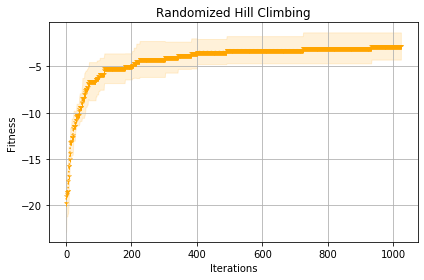

Avg elapsed time: 0.6171 (+/- 0.160) seconds


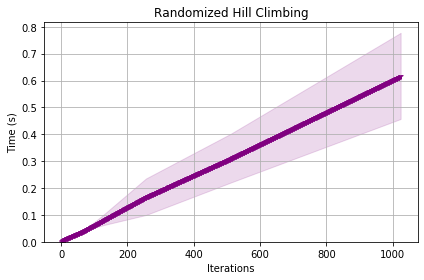

In [14]:
run_plot(iterations=iterations, data=rhc_fitness_df, x_label='Iterations', y_label='Fitness', 
         title='Randomized Hill Climbing', scale_x=False, y_min=None, y_max=None, negate=True, save_as='RHC/Queens_fitness')
run_plot(iterations=iterations, data=rhc_time_df, x_label='Iterations', y_label='Time (s)', 
         title='Randomized Hill Climbing', scale_x=False, y_min=0, y_max=None, save_as='RHC/Queens_time')

In [15]:
# Solve using simulated annealing
experiment_name = 'Queens'

iterations = [i for i in range(0, 2**10+1)]
seeds = [1, 2, 3, 4, 5]
sa_time_df = pd.DataFrame(index=iterations, columns=seeds)
sa_fitness_df = pd.DataFrame(index=iterations, columns=seeds)
for seed in seeds:
    # Using default mlrose.GeomDecay as the decay schedule
    sa = mlrose.SARunner(problem=problem,
                         experiment_name=experiment_name,
                         seed=seed,
                         iteration_list=2 ** np.arange(11),
                         max_attempts=1000,
                         temperature_list=[100])

    # Results
    df_run_stats, df_run_curves = sa.run()
    
    # Save and format results for plotting
    sa_time_df[seed] = df_run_curves['Time']
    sa_fitness_df[seed] = df_run_curves['Fitness']

Running sa
*** Iteration START - params: {'max_iters': 1024, 'schedule': GeomDecay(init_temp=100, decay=0.99, min_temp=0.001)}
schedule:[100]
runner_name:[sa], experiment_name:[Queens], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[17.0000]


schedule:[100]
runner_name:[sa], experiment_name:[Queens], attempt:[1], iteration:[1], done:[False], time:[0.00], fitness:[20.0000]


schedule:[100]
runner_name:[sa], experiment_name:[Queens], attempt:[1], iteration:[2], done:[False], time:[0.01], fitness:[21.0000]


schedule:[100]
runner_name:[sa], experiment_name:[Queens], attempt:[1], iteration:[4], done:[False], time:[0.01], fitness:[19.0000]


schedule:[100]
runner_name:[sa], experiment_name:[Queens], attempt:[1], iteration:[8], done:[False], time:[0.02], fitness:[20.0000]


schedule:[100]
runner_name:[sa], experiment_name:[Queens], attempt:[1], iteration:[16], done:[False], time:[0.03], fitness:[11.0000]


schedule:[100]
runner_name:[sa], experiment_name:[Queens], attempt:[

schedule:[100]
runner_name:[sa], experiment_name:[Queens], attempt:[1], iteration:[256], done:[False], time:[0.25], fitness:[18.0000]


schedule:[100]
runner_name:[sa], experiment_name:[Queens], attempt:[1], iteration:[512], done:[False], time:[0.47], fitness:[8.0000]


schedule:[100]
runner_name:[sa], experiment_name:[Queens], attempt:[46], iteration:[1024], done:[False], time:[0.79], fitness:[2.0000]


*** Iteration END - params: {'max_iters': 1024, 'schedule': GeomDecay(init_temp=100, decay=0.99, min_temp=0.001)}
Run time: 0.7951022000002013


Avg final fitness score: -2.4000 (+/- 0.490)


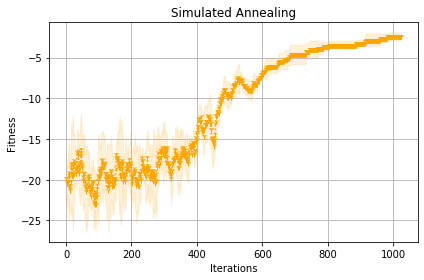

Avg elapsed time: 0.8527 (+/- 0.073) seconds


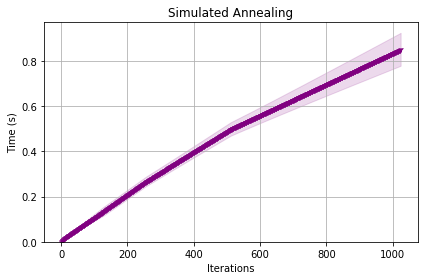

In [16]:
run_plot(iterations=iterations, data=sa_fitness_df, x_label='Iterations', y_label='Fitness', 
         title='Simulated Annealing', scale_x=False, y_min=None, y_max=None, negate=True, save_as='SA/Queens_fitness')
run_plot(iterations=iterations, data=sa_time_df, x_label='Iterations', y_label='Time (s)', 
         title='Simulated Annealing', scale_x=False, y_min=0, y_max=None, save_as='SA/Queens_time')

In [17]:
# Solve using genetic algorithm
experiment_name = 'Queens'

iterations = [i for i in range(0, 2**10+1)]
seeds = [1, 2, 3, 4, 5]
ga_time_df = pd.DataFrame(index=iterations, columns=seeds)
ga_fitness_df = pd.DataFrame(index=iterations, columns=seeds)
for seed in seeds:
    ga = mlrose.GARunner(problem=problem,
                         experiment_name=experiment_name,
                         seed=seed,
                         iteration_list=2 ** np.arange(11),
                         max_attempts=1000,
                         population_sizes=[200],
                         mutation_rates=[0.2])

    # Results
    df_run_stats, df_run_curves = ga.run()
    
    # Save and format results for plotting
    ga_time_df[seed] = df_run_curves['Time']
    ga_fitness_df[seed] = df_run_curves['Fitness']

Running ga
*** Iteration START - params: {'max_iters': 1024, 'pop_size': 200, 'mutation_prob': 0.2}
pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[Queens], attempt:[0], iteration:[0], done:[False], time:[0.10], fitness:[17.0000]


pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[Queens], attempt:[1], iteration:[1], done:[False], time:[0.20], fitness:[12.0000]


pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[Queens], attempt:[1], iteration:[2], done:[False], time:[0.31], fitness:[11.0000]


pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[Queens], attempt:[3], iteration:[4], done:[False], time:[0.56], fitness:[11.0000]


pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[Queens], attempt:[3], iteration:[8], done:[False], time:[0.96], fitness:[10.0000]


pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[Queens], attempt:[11], iteration:[16], done:[False], t

pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[Queens], attempt:[1], iteration:[1], done:[False], time:[0.18], fitness:[11.0000]


pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[Queens], attempt:[1], iteration:[2], done:[False], time:[0.28], fitness:[9.0000]


pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[Queens], attempt:[3], iteration:[4], done:[False], time:[0.49], fitness:[9.0000]


pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[Queens], attempt:[7], iteration:[8], done:[False], time:[0.89], fitness:[9.0000]


pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[Queens], attempt:[15], iteration:[16], done:[False], time:[1.69], fitness:[9.0000]


pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[Queens], attempt:[31], iteration:[32], done:[False], time:[3.32], fitness:[9.0000]


pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[

Avg final fitness score: -3.0000 (+/- 0.632)


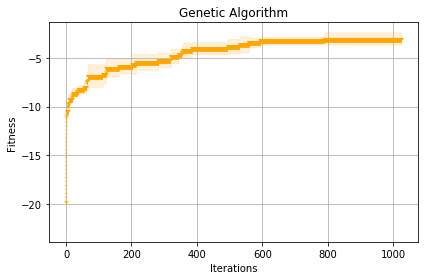

Avg elapsed time: 104.1396 (+/- 0.714) seconds


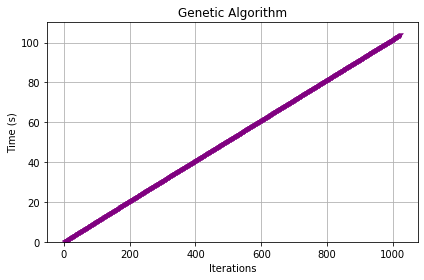

In [18]:
run_plot(iterations=iterations, data=ga_fitness_df, x_label='Iterations', y_label='Fitness', 
         title='Genetic Algorithm', scale_x=False, y_min=None, y_max=None, negate=True, save_as='GA/Queens_fitness')
run_plot(iterations=iterations, data=ga_time_df, x_label='Iterations', y_label='Time (s)', 
         title='Genetic Algorithm', scale_x=False, y_min=0, y_max=None, save_as='GA/Queens_time')

In [19]:
# Solve using MIMIC algorithm
experiment_name = 'Queens'

iterations = [i for i in range(0, 2**10+1)]
seeds = [1, 2, 3, 4, 5]
mimic_time_df = pd.DataFrame(index=iterations, columns=seeds)
mimic_fitness_df = pd.DataFrame(index=iterations, columns=seeds)
for seed in seeds:
    mimic = mlrose.MIMICRunner(problem=problem,
                               experiment_name=experiment_name,
                               seed=seed,
                               iteration_list=2 ** np.arange(11),
                               max_attempts=1000,
                               population_sizes=[400],
                               keep_percent_list=[0.6])
    # Results
    df_run_stats, df_run_curves = mimic.run()

    # Save and format results for plotting
    mimic_time_df[seed] = df_run_curves['Time']
    mimic_fitness_df[seed] = df_run_curves['Fitness']

Running mimic
*** Iteration START - params: {'max_iters': 1024, 'pop_size': 400, 'keep_pct': 0.6}
pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[Queens], attempt:[0], iteration:[0], done:[False], time:[0.18], fitness:[17.0000]


pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[Queens], attempt:[1], iteration:[1], done:[False], time:[0.52], fitness:[10.0000]


pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[Queens], attempt:[2], iteration:[2], done:[False], time:[0.87], fitness:[10.0000]


pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[Queens], attempt:[4], iteration:[4], done:[False], time:[1.55], fitness:[10.0000]


pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[Queens], attempt:[1], iteration:[8], done:[False], time:[2.88], fitness:[8.0000]


pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[Queens], attempt:[9], iteration:[16], done:[False], time:[5.52], fitn

pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[Queens], attempt:[0], iteration:[0], done:[False], time:[0.24], fitness:[18.0000]


pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[Queens], attempt:[1], iteration:[1], done:[False], time:[0.59], fitness:[9.0000]


pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[Queens], attempt:[2], iteration:[2], done:[False], time:[0.95], fitness:[9.0000]


pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[Queens], attempt:[4], iteration:[4], done:[False], time:[1.61], fitness:[9.0000]


pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[Queens], attempt:[8], iteration:[8], done:[False], time:[3.02], fitness:[9.0000]


pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[Queens], attempt:[6], iteration:[16], done:[False], time:[6.19], fitness:[8.0000]


pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[Queens], attempt:

Avg final fitness score: -6.4000 (+/- 1.020)


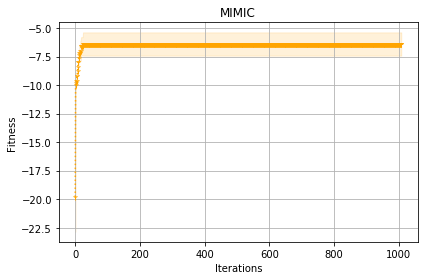

Avg elapsed time: 317.8435 (+/- 3.411) seconds


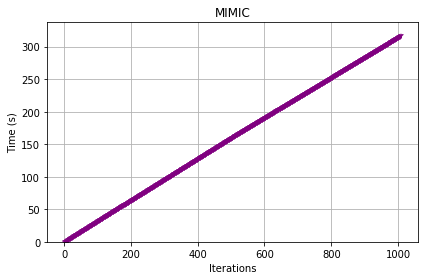

In [21]:
run_plot(iterations=iterations, data=mimic_fitness_df, x_label='Iterations', y_label='Fitness', 
         title='MIMIC', scale_x=False, y_min=None, y_max=None, negate=True, save_as='MIMIC/Queens_fitness')
run_plot(iterations=iterations, data=mimic_time_df, x_label='Iterations', y_label='Time (s)', 
         title='MIMIC', scale_x=False, y_min=0, y_max=None, save_as='MIMIC/Queens_time')

### Flip Flop

In [22]:
# Generate optimization problem fitness function
problem = mlrose.FlipFlopGenerator.generate(seed=42, size=20)

In [23]:
# Solve using randomized hill climbing
experiment_name = 'FlipFlop'

iterations = [i for i in range(0, 2**10+1)]
seeds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
rhc_time_df = pd.DataFrame(index=iterations, columns=seeds)
rhc_fitness_df = pd.DataFrame(index=iterations, columns=seeds)
for seed in seeds:
    rhc = mlrose.RHCRunner(problem=problem,
                           experiment_name=experiment_name,
                           seed=seed,
                           iteration_list=2 ** np.arange(11),
                           max_attempts=1000,
                           restart_list=[15])

    # Results
    df_run_stats, df_run_curves = rhc.run()
    
    # Save and format results for plotting
    rhc_time_df[seed] = df_run_curves['Time']
    rhc_fitness_df[seed] = df_run_curves['Fitness']

Running rhc
*** Iteration START - params: {'max_iters': 1024, 'restarts': 15}
restarts:[15], current_restart:[0]
runner_name:[rhc], experiment_name:[FlipFlop], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[9.0000]


restarts:[15], current_restart:[0]
runner_name:[rhc], experiment_name:[FlipFlop], attempt:[1], iteration:[1], done:[False], time:[0.00], fitness:[11.0000]


restarts:[15], current_restart:[0]
runner_name:[rhc], experiment_name:[FlipFlop], attempt:[2], iteration:[2], done:[False], time:[0.00], fitness:[11.0000]


restarts:[15], current_restart:[0]
runner_name:[rhc], experiment_name:[FlipFlop], attempt:[4], iteration:[4], done:[False], time:[0.00], fitness:[11.0000]


restarts:[15], current_restart:[0]
runner_name:[rhc], experiment_name:[FlipFlop], attempt:[8], iteration:[8], done:[False], time:[0.00], fitness:[11.0000]


restarts:[15], current_restart:[0]
runner_name:[rhc], experiment_name:[FlipFlop], attempt:[3], iteration:[16], done:[False], time:[0.00], 

restarts:[15], current_restart:[0]
runner_name:[rhc], experiment_name:[FlipFlop], attempt:[1000], iteration:[1024], done:[False], time:[0.11], fitness:[17.0000]


restarts:[15], current_restart:[1]
runner_name:[rhc], experiment_name:[FlipFlop], attempt:[0], iteration:[0], done:[False], time:[0.11], fitness:[9.0000]


restarts:[15], current_restart:[1]
runner_name:[rhc], experiment_name:[FlipFlop], attempt:[2], iteration:[1], done:[False], time:[0.11], fitness:[9.0000]


restarts:[15], current_restart:[1]
runner_name:[rhc], experiment_name:[FlipFlop], attempt:[3], iteration:[2], done:[False], time:[0.11], fitness:[9.0000]


restarts:[15], current_restart:[1]
runner_name:[rhc], experiment_name:[FlipFlop], attempt:[5], iteration:[4], done:[False], time:[0.11], fitness:[9.0000]


restarts:[15], current_restart:[1]
runner_name:[rhc], experiment_name:[FlipFlop], attempt:[1], iteration:[8], done:[False], time:[0.12], fitness:[13.0000]


restarts:[15], current_restart:[1]
runner_name:[rhc], ex

restarts:[15], current_restart:[0]
runner_name:[rhc], experiment_name:[FlipFlop], attempt:[960], iteration:[1024], done:[False], time:[0.12], fitness:[16.0000]


restarts:[15], current_restart:[1]
runner_name:[rhc], experiment_name:[FlipFlop], attempt:[0], iteration:[0], done:[False], time:[0.12], fitness:[12.0000]


restarts:[15], current_restart:[1]
runner_name:[rhc], experiment_name:[FlipFlop], attempt:[2], iteration:[1], done:[False], time:[0.12], fitness:[12.0000]


restarts:[15], current_restart:[1]
runner_name:[rhc], experiment_name:[FlipFlop], attempt:[3], iteration:[2], done:[False], time:[0.12], fitness:[12.0000]


restarts:[15], current_restart:[1]
runner_name:[rhc], experiment_name:[FlipFlop], attempt:[5], iteration:[4], done:[False], time:[0.12], fitness:[12.0000]


restarts:[15], current_restart:[1]
runner_name:[rhc], experiment_name:[FlipFlop], attempt:[2], iteration:[8], done:[False], time:[0.12], fitness:[13.0000]


restarts:[15], current_restart:[1]
runner_name:[rhc],

restarts:[15], current_restart:[3]
runner_name:[rhc], experiment_name:[FlipFlop], attempt:[1001], iteration:[1020], done:[True], time:[0.46], fitness:[16.0000]


*** Iteration END - params: {'max_iters': 1024, 'restarts': 15}
Run time: 0.4668779000003269


Avg final fitness score: 15.6000 (+/- 1.281)


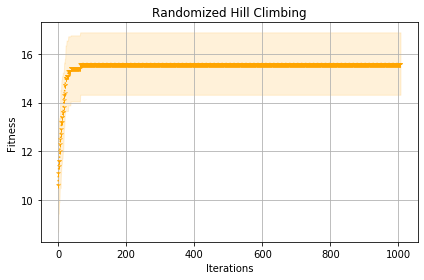

Avg elapsed time: 0.1141 (+/- 0.012) seconds


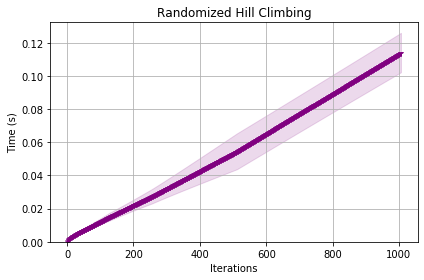

In [24]:
run_plot(iterations=iterations, data=rhc_fitness_df, x_label='Iterations', y_label='Fitness', 
         title='Randomized Hill Climbing', scale_x=False, y_min=None, y_max=None, save_as='RHC/FlipFlop_fitness')
run_plot(iterations=iterations, data=rhc_time_df, x_label='Iterations', y_label='Time (s)', 
         title='Randomized Hill Climbing', scale_x=False, y_min=0, y_max=None, save_as='RHC/FlipFlop_time')

In [25]:
# Solve using simulated annealing
experiment_name = 'FlipFlop'

iterations = [i for i in range(0, 2**10+1)]
seeds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sa_time_df = pd.DataFrame(index=iterations, columns=seeds)
sa_fitness_df = pd.DataFrame(index=iterations, columns=seeds)
for seed in seeds:
    # Using default mlrose.GeomDecay as the decay schedule
    sa = mlrose.SARunner(problem=problem,
                         experiment_name=experiment_name,
                         seed=seed,
                         iteration_list=2 ** np.arange(11),
                         max_attempts=1000,
                         temperature_list=[100])

    # Results
    df_run_stats, df_run_curves = sa.run()
    
    # Save and format results for plotting
    sa_time_df[seed] = df_run_curves['Time']
    sa_fitness_df[seed] = df_run_curves['Fitness']

Running sa
*** Iteration START - params: {'max_iters': 1024, 'schedule': GeomDecay(init_temp=100, decay=0.99, min_temp=0.001)}
schedule:[100]
runner_name:[sa], experiment_name:[FlipFlop], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[9.0000]


schedule:[100]
runner_name:[sa], experiment_name:[FlipFlop], attempt:[1], iteration:[1], done:[False], time:[0.00], fitness:[11.0000]


schedule:[100]
runner_name:[sa], experiment_name:[FlipFlop], attempt:[1], iteration:[2], done:[False], time:[0.00], fitness:[11.0000]


schedule:[100]
runner_name:[sa], experiment_name:[FlipFlop], attempt:[1], iteration:[4], done:[False], time:[0.00], fitness:[11.0000]


schedule:[100]
runner_name:[sa], experiment_name:[FlipFlop], attempt:[1], iteration:[8], done:[False], time:[0.00], fitness:[10.0000]


schedule:[100]
runner_name:[sa], experiment_name:[FlipFlop], attempt:[1], iteration:[16], done:[False], time:[0.00], fitness:[9.0000]


schedule:[100]
runner_name:[sa], experiment_name:[FlipFlop

schedule:[100]
runner_name:[sa], experiment_name:[FlipFlop], attempt:[1], iteration:[128], done:[False], time:[0.02], fitness:[12.0000]


schedule:[100]
runner_name:[sa], experiment_name:[FlipFlop], attempt:[1], iteration:[256], done:[False], time:[0.04], fitness:[12.0000]


schedule:[100]
runner_name:[sa], experiment_name:[FlipFlop], attempt:[2], iteration:[512], done:[False], time:[0.07], fitness:[17.0000]


schedule:[100]
runner_name:[sa], experiment_name:[FlipFlop], attempt:[29], iteration:[1024], done:[False], time:[0.14], fitness:[18.0000]


*** Iteration END - params: {'max_iters': 1024, 'schedule': GeomDecay(init_temp=100, decay=0.99, min_temp=0.001)}
Run time: 0.1436011999994662
Running sa
*** Iteration START - params: {'max_iters': 1024, 'schedule': GeomDecay(init_temp=100, decay=0.99, min_temp=0.001)}
schedule:[100]
runner_name:[sa], experiment_name:[FlipFlop], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[8.0000]


schedule:[100]
runner_name:[sa], experime

schedule:[100]
runner_name:[sa], experiment_name:[FlipFlop], attempt:[1], iteration:[512], done:[False], time:[0.07], fitness:[16.0000]


schedule:[100]
runner_name:[sa], experiment_name:[FlipFlop], attempt:[16], iteration:[1024], done:[False], time:[0.14], fitness:[18.0000]


*** Iteration END - params: {'max_iters': 1024, 'schedule': GeomDecay(init_temp=100, decay=0.99, min_temp=0.001)}
Run time: 0.1380938000002061


Avg final fitness score: 16.3000 (+/- 1.269)


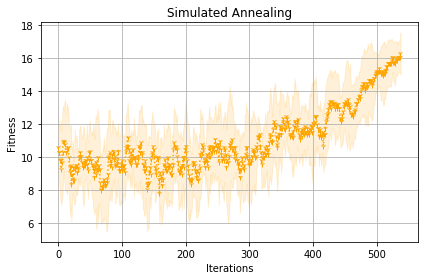

Avg elapsed time: 0.0796 (+/- 0.006) seconds


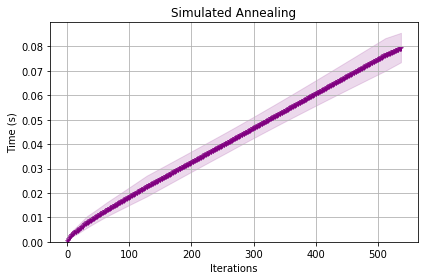

In [26]:
run_plot(iterations=iterations, data=sa_fitness_df, x_label='Iterations', y_label='Fitness', 
         title='Simulated Annealing', scale_x=False, y_min=None, y_max=None, save_as='SA/FlipFlop_fitness')
run_plot(iterations=iterations, data=sa_time_df, x_label='Iterations', y_label='Time (s)', 
         title='Simulated Annealing', scale_x=False, y_min=0, y_max=None, save_as='SA/FlipFlop_time')

In [27]:
# Solve using genetic algorithm
experiment_name = 'FlipFlop'

iterations = [i for i in range(0, 2**10+1)]
seeds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
ga_time_df = pd.DataFrame(index=iterations, columns=seeds)
ga_fitness_df = pd.DataFrame(index=iterations, columns=seeds)
for seed in seeds:
    ga = mlrose.GARunner(problem=problem,
                         experiment_name=experiment_name,
                         seed=seed,
                         iteration_list=2 ** np.arange(11),
                         max_attempts=1000,
                         population_sizes=[200],
                         mutation_rates=[0.2])

    # Results
    df_run_stats, df_run_curves = ga.run()
    
    # Save and format results for plotting
    ga_time_df[seed] = df_run_curves['Time']
    ga_fitness_df[seed] = df_run_curves['Fitness']

Running ga
*** Iteration START - params: {'max_iters': 1024, 'pop_size': 200, 'mutation_prob': 0.2}
pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[FlipFlop], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[9.0000]


pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[FlipFlop], attempt:[1], iteration:[1], done:[False], time:[0.02], fitness:[17.0000]


pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[FlipFlop], attempt:[2], iteration:[2], done:[False], time:[0.03], fitness:[17.0000]


pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[FlipFlop], attempt:[4], iteration:[4], done:[False], time:[0.05], fitness:[17.0000]


pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[FlipFlop], attempt:[4], iteration:[8], done:[False], time:[0.09], fitness:[18.0000]


pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[FlipFlop], attempt:[12], iteration:[16], done

pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[FlipFlop], attempt:[1], iteration:[11], done:[True], time:[0.12], fitness:[19.0000]


*** Iteration END - params: {'max_iters': 1024, 'pop_size': 200, 'mutation_prob': 0.2}
Run time: 0.11871419999988575
Running ga
*** Iteration START - params: {'max_iters': 1024, 'pop_size': 200, 'mutation_prob': 0.2}
pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[FlipFlop], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[14.0000]


pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[FlipFlop], attempt:[1], iteration:[1], done:[False], time:[0.01], fitness:[15.0000]


pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[FlipFlop], attempt:[1], iteration:[2], done:[False], time:[0.02], fitness:[16.0000]


pop_size:[200], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[FlipFlop], attempt:[3], iteration:[4], done:[False], time:[0.04], fitness:[16.0000]


Avg final fitness score: 17.4000 (+/- 0.663)


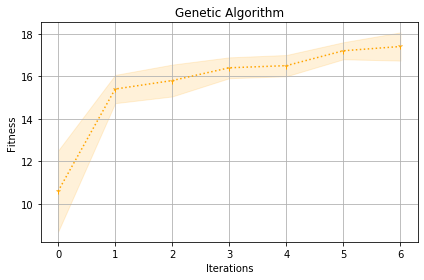

Avg elapsed time: 0.0633 (+/- 0.004) seconds


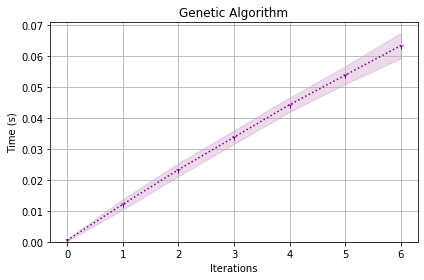

In [28]:
run_plot(iterations=iterations, data=ga_fitness_df, x_label='Iterations', y_label='Fitness', 
         title='Genetic Algorithm', scale_x=False, y_min=None, y_max=None, save_as='GA/FlipFlop_fitness')
run_plot(iterations=iterations, data=ga_time_df, x_label='Iterations', y_label='Time (s)', 
         title='Genetic Algorithm', scale_x=False, y_min=0, y_max=None, save_as='GA/FlipFlop_time')

In [29]:
# Solve using MIMIC algorithm
experiment_name = 'FlipFlop'

iterations = [i for i in range(0, 2**10+1)]
seeds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
mimic_time_df = pd.DataFrame(index=iterations, columns=seeds)
mimic_fitness_df = pd.DataFrame(index=iterations, columns=seeds)
for seed in seeds:
    mimic = mlrose.MIMICRunner(problem=problem,
                               experiment_name=experiment_name,
                               seed=seed,
                               iteration_list=2 ** np.arange(11),
                               max_attempts=1000,
                               population_sizes=[400],
                               keep_percent_list=[0.6])
    # Results
    df_run_stats, df_run_curves = mimic.run()

    # Save and format results for plotting
    mimic_time_df[seed] = df_run_curves['Time']
    mimic_fitness_df[seed] = df_run_curves['Fitness']

Running mimic
*** Iteration START - params: {'max_iters': 1024, 'pop_size': 400, 'keep_pct': 0.6}
pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[FlipFlop], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[9.0000]


pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[FlipFlop], attempt:[1], iteration:[1], done:[False], time:[0.13], fitness:[16.0000]


pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[FlipFlop], attempt:[2], iteration:[2], done:[False], time:[0.27], fitness:[16.0000]


pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[FlipFlop], attempt:[2], iteration:[4], done:[False], time:[0.52], fitness:[18.0000]


pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[FlipFlop], attempt:[1], iteration:[7], done:[True], time:[0.90], fitness:[19.0000]


*** Iteration END - params: {'max_iters': 1024, 'pop_size': 400, 'keep_pct': 0.6}
Run time: 0.9051133000002665
Running mimic
*** 

pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[FlipFlop], attempt:[2], iteration:[2], done:[False], time:[0.26], fitness:[16.0000]


pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[FlipFlop], attempt:[1], iteration:[4], done:[False], time:[0.50], fitness:[18.0000]


pop_size:[400], keep_pct:[0.6]
runner_name:[mimic], experiment_name:[FlipFlop], attempt:[1], iteration:[7], done:[True], time:[0.93], fitness:[19.0000]


*** Iteration END - params: {'max_iters': 1024, 'pop_size': 400, 'keep_pct': 0.6}
Run time: 0.9309691999997085


Avg final fitness score: 17.8000 (+/- 0.600)


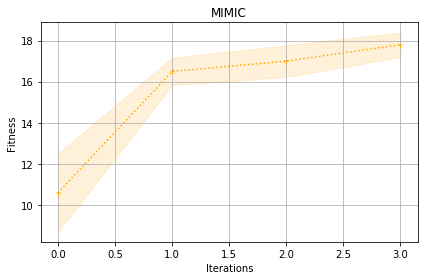

Avg elapsed time: 0.3743 (+/- 0.023) seconds


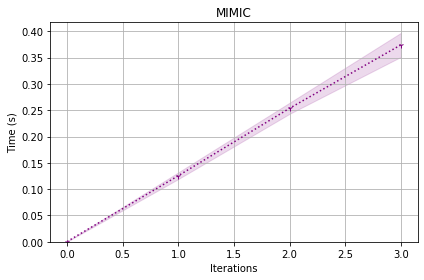

In [30]:
run_plot(iterations=iterations, data=mimic_fitness_df, x_label='Iterations', y_label='Fitness', 
         title='MIMIC', scale_x=False, y_min=None, y_max=None, save_as='MIMIC/FlipFlop_fitness')
run_plot(iterations=iterations, data=mimic_time_df, x_label='Iterations', y_label='Time (s)', 
         title='MIMIC', scale_x=False, y_min=0, y_max=None, save_as='MIMIC/FlipFlop_time')